In [0]:
import tensorflow as tf

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [0]:
mnist.train.images #array of images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
mnist.train.num_examples

55000

In [0]:
mnist.test.num_examples

10000

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
single_image = mnist.train.images[1].reshape(28,28)

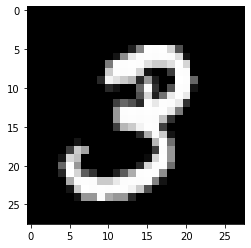

In [0]:
plt.imshow(single_image, cmap='gist_gray')

In [0]:
#it is normalized
single_image.min()

0.0

In [0]:
single_image.max()

1.0

In [0]:
#Placeholders
x = tf.placeholder(tf.float32,shape=[None,784])

In [0]:
#Variables
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [0]:
#Create Graph Operation
y = tf.matmul(x,W) + b

In [0]:
#Loss Function

#We need one more place holder which is called y_true
y_true = tf.placeholder(tf.float32,shape=[None,10]) #shape=[none, 10] because of 10 possible labels

In [0]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
#Optimizer
optimizer  = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [0]:
#Session
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
for step in range(1000):

  batch_x, batch_y = mnist.train.next_batch(100)

  sess.run(train,feed_dict={x:batch_x, y_true:batch_y})

#Evaluating the model
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
acc = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9184
